# 교통·문화·통신 빅데이터 플랫폼 융합 분석 경진대회

- 시니어시설과 시니어 관광객 수의 관계성을 중심으로 

### 시니어 시설 데이터 목록
1. 시니어 나들이 추천 목록(2020).csv
2. 시니어 문화시설 목록(2020).csv
3. 시니어 배움터 시설 목록(2020).csv
4. 국내 문화체육관광시설 인근 의료 및 의약시설정보.csv

### KT 관광객 데이터 목록
1. (KT)플랫폼통합경진대회_강릉시_행정동_1.일별관광객수.csv
2. (KT)플랫폼통합경진대회_강릉시_행정동_2.성연령별관광객수.csv
3. (KT)플랫폼통합경진대회_목포시_행정동_1.일별관광객수.csv
4. (KT)플랫폼통합경진대회_목포시_행정동_2.성연령별관광객수.csv
5. (KT)플랫폼통합경진대회_전주시_행정동_1.일별관광객수.csv
6. (KT)플랫폼통합경진대회_전주시_행정동_2.성연령별관광객수.csv

# 0. 전처리

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn') # 다른 스타일도 사용가능, 여기서는 'seaborn'스타일 사용
sns.set(font_scale = 1.5) # font size 를 미리 지정, seaborn의 font_scale을 사용

# 데이터셋에 채워지지 않은 null 데이터를 쉽게 찾아주는 패키지
import missingno as msno

import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline 
#노트북에서 바로바로 시각화 가능

### 0. 데이터 확인
#### 시별('SIGNGU_NM') 데이터 분류

*참고) 전주시의 경우 '전주시 덕진구', '전주시 완산구' 형태의 데이터가 포함되어있음

In [28]:
file_path1 = './data/시니어 나들이 추천 목록(2020).csv'
file_path2 = './data/시니어 문화시설 목록(2020).csv'
file_path3 = './data/시니어 배움터 시설 목록(2020).csv'

df_1 = pd.read_csv(file_path1)
df_2 = pd.read_csv(file_path2)
df_3 = pd.read_csv(file_path3)


# + 추가
file_path4 = './data/국내 문화체육관광시설 인근 의료 및 의약시설정보.csv'
df_4 = pd.read_csv(file_path4)

In [29]:
# 전주시 완산구 & 전주시 덕진구 => 전주시로 통일

df_1['SIGNGU_NM'] = df_1['SIGNGU_NM'].str.replace('전주시 완산구', '전주시')
df_1['SIGNGU_NM'] = df_1['SIGNGU_NM'].str.replace('전주시 덕진구', '전주시')

df_2['SIGNGU_NM'] = df_2['SIGNGU_NM'].str.replace('전주시 완산구', '전주시')
df_2['SIGNGU_NM'] = df_2['SIGNGU_NM'].str.replace('전주시 덕진구', '전주시')

df_3['SIGNGU_NM'] = df_3['SIGNGU_NM'].str.replace('전주시 완산구', '전주시')
df_3['SIGNGU_NM'] = df_3['SIGNGU_NM'].str.replace('전주시 덕진구', '전주시')

In [30]:
# 강릉시, 목포시, 전주시 데이터만 추출
List = ['강릉시', '목포시', '전주시']

# 시니어 나들이 시설
PCN_df = df_1.loc[df_1['SIGNGU_NM'].isin(List)]

# 시니어 문화시설
FCLTY_df = df_2[df_2['SIGNGU_NM'].isin(List)]

# 시니어 배움터 시설
LNC_df = df_3[df_3['SIGNGU_NM'].isin(List)]

#### Null data check

In [31]:
def NullCheck(data):
    for col in data.columns:
        msg = 'column: {:>20}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (data[col].isnull().sum() / data[col].shape[0]))
        print(msg)

In [32]:
NullCheck(PCN_df)

column:             ESNTL_ID	 Percent of NaN value: 0.00%
column:             LCLAS_NM	 Percent of NaN value: 0.00%
column:             MLSFC_NM	 Percent of NaN value: 0.00%
column:             FCLTY_NM	 Percent of NaN value: 0.00%
column:            CTPRVN_CD	 Percent of NaN value: 0.00%
column:            CTPRVN_NM	 Percent of NaN value: 0.00%
column:            SIGNGU_CD	 Percent of NaN value: 0.00%
column:            SIGNGU_NM	 Percent of NaN value: 0.00%
column:         LEGALDONG_CD	 Percent of NaN value: 37.01%
column:         LEGALDONG_NM	 Percent of NaN value: 0.00%
column:           ROAD_NM_CD	 Percent of NaN value: 20.48%
column:   FCLTY_ROAD_NM_ADDR	 Percent of NaN value: 21.00%
column:             LNM_ADDR	 Percent of NaN value: 0.69%
column:          ADDR_ENG_NM	 Percent of NaN value: 21.51%
column:            ADSTRD_CD	 Percent of NaN value: 21.51%
column:              BULD_NM	 Percent of NaN value: 65.23%
column:       BULD_MANAGE_CD	 Percent of NaN value: 21.51%
column:

###### Null Data 확인 후 활용가능한 컬럼만 추출

- 대분류명 : LCLAS_NM
- 중분류명 : MLSFC_NM
- 시설명 : FCLTY_NM
- 시도명 : CTPRVN_CD
- 시군구명 : SIGNGU_NM
- 법정동명 : LEGALDONG_NM
- 지번주소 : LNM_ADDR
- 시설위도 : FCLTY_LA
- 시설경도 : FCLTY_LO

*지번주소 null data(1.36%) 처리

In [33]:
# 시니어 나들이 시설
PCN_df = PCN_df[['LCLAS_NM','MLSFC_NM','FCLTY_NM','CTPRVN_CD','SIGNGU_NM','LEGALDONG_NM','LNM_ADDR','FCLTY_LA','FCLTY_LO']]

# 시니어 문화시설
FCLTY_df = FCLTY_df[['LCLAS_NM','MLSFC_NM','FCLTY_NM','CTPRVN_CD','SIGNGU_NM','LEGALDONG_NM','LNM_ADDR','FCLTY_LA','FCLTY_LO']]

# 시니어 배움터 시설
LNC_df = LNC_df[['LCLAS_NM','MLSFC_NM','FCLTY_NM','CTPRVN_CD','SIGNGU_NM','LEGALDONG_NM','LNM_ADDR','FCLTY_LA','FCLTY_LO']]

#### PCN 데이터 LNM_ADDR 결측값 처리

In [34]:
PCN_df[PCN_df['LNM_ADDR'].isnull()]

,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_CD,SIGNGU_NM,LEGALDONG_NM,LNM_ADDR,FCLTY_LA,FCLTY_LO
6729,자연,자연_공원,옥암수변공원,46,목포시,옥암동,NaN,34.804158,126.447724
14059,자연,자연_공원,아들바위공원,42,강릉시,주문진읍,NaN,37.905793,128.830348
15257,자연,자연_공원,옥암수변공원,46,목포시,옥암동,NaN,34.804158,126.447724
22587,자연,자연_공원,아들바위공원,42,강릉시,주문진읍,NaN,37.905793,128.830348


In [35]:
# 중복값 존재 => 중복데이터 삭제
PCN_df.drop([6729], inplace = True)

In [36]:
PCN_df.drop([22587], inplace = True)

#### 데이터 확인
- 대분류/중분류/시설명 확인 후 시설속성 파악 

In [37]:
PCN_df['MLSFC_NM'].unique()

array(['무장애장소', '자연_공원', '무장애장소_나눔길', '쇼핑시설_전통시장'], dtype=object)

In [38]:
#시니어 시설 데이터 합치기
SFCLT_df = pd.concat([PCN_df,FCLTY_df,LNC_df])

#### KT 관광 데이터 불러오기

In [66]:
# KT 관광객 데이터 목록
file_path1 = './data/(KT)플랫폼통합경진대회_강릉시_행정동_2.성연령별관광객수.csv'
file_path2 = './data/(KT)플랫폼통합경진대회_목포시_행정동_2.성연령별관광객수.csv'
file_path3 = './data/(KT)플랫폼통합경진대회_전주시_행정동_2.성연령별관광객수.csv'

df_1 = pd.read_csv(file_path1, encoding = 'CP949')
df_2 = pd.read_csv(file_path2, encoding = 'CP949')
df_3 = pd.read_csv(file_path3, encoding = 'CP949')

In [67]:
# 시설 데이터, KT 관광데이터 컬럼명 통일 시켜주기
df_1.rename(columns = {'SIDO_NM': 'CTPRVN_CD' ,'SGG_NM' : 'SIGNGU_NM' , 'ADMDONG_NM' :'LEGALDONG_NM'}, inplace = True)
df_2.rename(columns = {'SIDO_NM': 'CTPRVN_CD' ,'SGG_NM' : 'SIGNGU_NM' , 'ADMDONG_NM' :'LEGALDONG_NM'}, inplace =True)
df_3.rename(columns = {'SIDO_NM': 'CTPRVN_CD' ,'SGG_NM' : 'SIGNGU_NM' , 'ADMDONG_NM' :'LEGALDONG_NM'}, inplace =True)

In [68]:
# 데이터 합치기
TR_df = pd.concat([df_1,df_2,df_3])

Null data check

In [69]:
TR_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348704 entries, 0 to 154549
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ETL_YMD       348704 non-null  int64 
 1   CTPRVN_CD     348704 non-null  object
 2   SIDO_CD       348704 non-null  int64 
 3   SIGNGU_NM     348704 non-null  object
 4   SGG_CD        348704 non-null  int64 
 5   LEGALDONG_NM  348704 non-null  object
 6   ADMDONG_CD    348704 non-null  int64 
 7   SEX_DIV_CD    348704 non-null  object
 8   AGE_DIV_CD    348704 non-null  object
 9   I_CNT         348704 non-null  object
 10  O_CNT         348704 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.9+ MB


In [70]:
# 필요없는 컬럼 삭제
TR_df.drop(['SIDO_CD','SGG_CD','ADMDONG_CD'], axis = 1, inplace = True)

In [71]:
# 컬럼 타입 변경(object => float)
# https://steadiness-193.tistory.com/122
# 천단위 자리 ',' 제거 and '-'으로 표시된 null값 처리
def to_int(df):
    df['I_CNT'] = df['I_CNT'].apply(lambda x: x.replace(',', '')).apply(lambda x: x.replace('-', '0')).astype(int)
    df['O_CNT'] = df['O_CNT'].apply(lambda x: x.replace(',', '')).apply(lambda x: x.replace('-', '0')).astype(int)
    return df

In [72]:
TR_df = to_int(TR_df)
TR_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348704 entries, 0 to 154549
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ETL_YMD       348704 non-null  int64 
 1   CTPRVN_CD     348704 non-null  object
 2   SIGNGU_NM     348704 non-null  object
 3   LEGALDONG_NM  348704 non-null  object
 4   SEX_DIV_CD    348704 non-null  object
 5   AGE_DIV_CD    348704 non-null  object
 6   I_CNT         348704 non-null  int32 
 7   O_CNT         348704 non-null  int32 
dtypes: int32(2), int64(1), object(5)
memory usage: 21.3+ MB


In [73]:
def to_datetime(df):
    df['ETL_YMD'] = pd.to_datetime(df['ETL_YMD'].astype(str), format="%Y%m%d")
    return df

In [74]:
TR_df = to_datetime(TR_df)

In [75]:
# 전주시 완산구 & 전주시 덕진구 => 전주시로 통일

TR_df['SIGNGU_NM'] = TR_df['SIGNGU_NM'].str.replace('전주시 완산구', '전주시')
TR_df['SIGNGU_NM'] = TR_df['SIGNGU_NM'].str.replace('전주시 덕진구', '전주시')

#### 노년층(6070) 데이터 추출

In [76]:
STR_df = TR_df[(TR_df['AGE_DIV_CD']=='A6069') | (TR_df['AGE_DIV_CD']=='A7000')]

In [77]:
STR_df.head()

,ETL_YMD,CTPRVN_CD,SIGNGU_NM,LEGALDONG_NM,SEX_DIV_CD,AGE_DIV_CD,I_CNT,O_CNT
6,2019-03-01,강원도,강릉시,강남동,F,A6069,787,166
7,2019-03-01,강원도,강릉시,강남동,F,A7000,444,111
14,2019-03-01,강원도,강릉시,강남동,M,A6069,1031,116
15,2019-03-01,강원도,강릉시,강남동,M,A7000,484,67
22,2019-03-01,강원도,강릉시,강동면,F,A6069,374,1225


#### <시니어 시설 데이터>
1.  시니어 나들이 시설 '무장애장소'를 포함하고 있으며, 무장애장소, 공원, 무장애 나눔길(산책로), 쇼핑시설(전통시장)으로 분류 가능
2. 시니어 문화시설은 모두 시니어클럽으로 분류 가능
3. 시니어 배움터 시설은 모두 노인복지관으로 분류 가능

* 무장애장소: 장애인과 노인 등의 이용 및 접근이 편리한 장소를 의미
* 노인복지관: 노인복지서비스를 제공하는 기관&노인을 위한 다양한 프로그램을 제공하기도 함
* 시니어 클럽: 노인 일자리 사업임

? 시니어_문화시설 + 배움터 => 노인복지기관으로 통일
#### H1: 시니어시설의 개수와 노년층 관광객의 수는 상관관계가 있을 것이다.
#### H1: 무장애시설의 개수와 노년층 관광객의 수는 상관관계가 있을 것 이다.
#### H1: 노인복지기관의 개수와 노년층 관광객 수는 상관관계가 있을 것 이다.

### 시각화 EDA 를 통한 분석 방향 설정

1. 시니어 시설 개수 파악
- 시도별 비교
- 행정동별 비교

2. 강릉시, 목포시, 전주시 관광객 수 비교
- 연령대별 비교
- 성별 비교

In [78]:
print('시니어 관광객 데이터')
STR_df.info()
print()
print('시니어 시설 데이터')
SFCLT_df.info()

시니어 관광객 데이터
<class 'pandas.core.frame.DataFrame'>
Int64Index: 87216 entries, 6 to 154549
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ETL_YMD       87216 non-null  datetime64[ns]
 1   CTPRVN_CD     87216 non-null  object        
 2   SIGNGU_NM     87216 non-null  object        
 3   LEGALDONG_NM  87216 non-null  object        
 4   SEX_DIV_CD    87216 non-null  object        
 5   AGE_DIV_CD    87216 non-null  object        
 6   I_CNT         87216 non-null  int32         
 7   O_CNT         87216 non-null  int32         
dtypes: datetime64[ns](1), int32(2), object(5)
memory usage: 5.3+ MB

시니어 시설 데이터
<class 'pandas.core.frame.DataFrame'>
Int64Index: 593 entries, 2894 to 310
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LCLAS_NM      593 non-null    object 
 1   MLSFC_NM      593 non-null    object 
 2   FCLTY_NM      

#### 시니어 시설 개수 파악
- 시도별 비교

In [79]:
print('[시군구별 시니어 시설 개수 비교]')
SFCLT_df[['SIGNGU_NM', 'FCLTY_NM']].groupby(['SIGNGU_NM'], as_index = True).count()

[시군구별 시니어 시설 개수 비교]


,FCLTY_NM
SIGNGU_NM,
강릉시,149
목포시,130
전주시,314


- 시니어시설 개수는 전주(314개) > 강릉(149개) > 목포(130개) 순서로 많음

#### 시군구별 시니어 관광객 수 파악

#### 시군구별 1일 평균 관광객수(현지인(I), 외지인(O) 비교)

In [128]:
STR_df[['SIGNGU_NM', 'I_CNT', 'O_CNT']].groupby(['SIGNGU_NM'], as_index = True).mean().astype('int')

,I_CNT,O_CNT
SIGNGU_NM,,
강릉시,823,251
목포시,584,171
전주시,665,258


- 외지인 관광객보다 현지인 관광객 수가 높음(I_CNT > O_CNT => 코로나영향?)
- 현지인 기준 시군구별 1일 평균 관광객 수는 강릉(823) > 전주(666) > 목포(585) 순으로 많음
- 외지인 기준 시군구별 1일 평균 관광객 수는 전주(259) > 강릉(251) > 목포(171) 순으로 많음

#### 코로나 전후 외지인/현지인 시니어관광객 수 변화

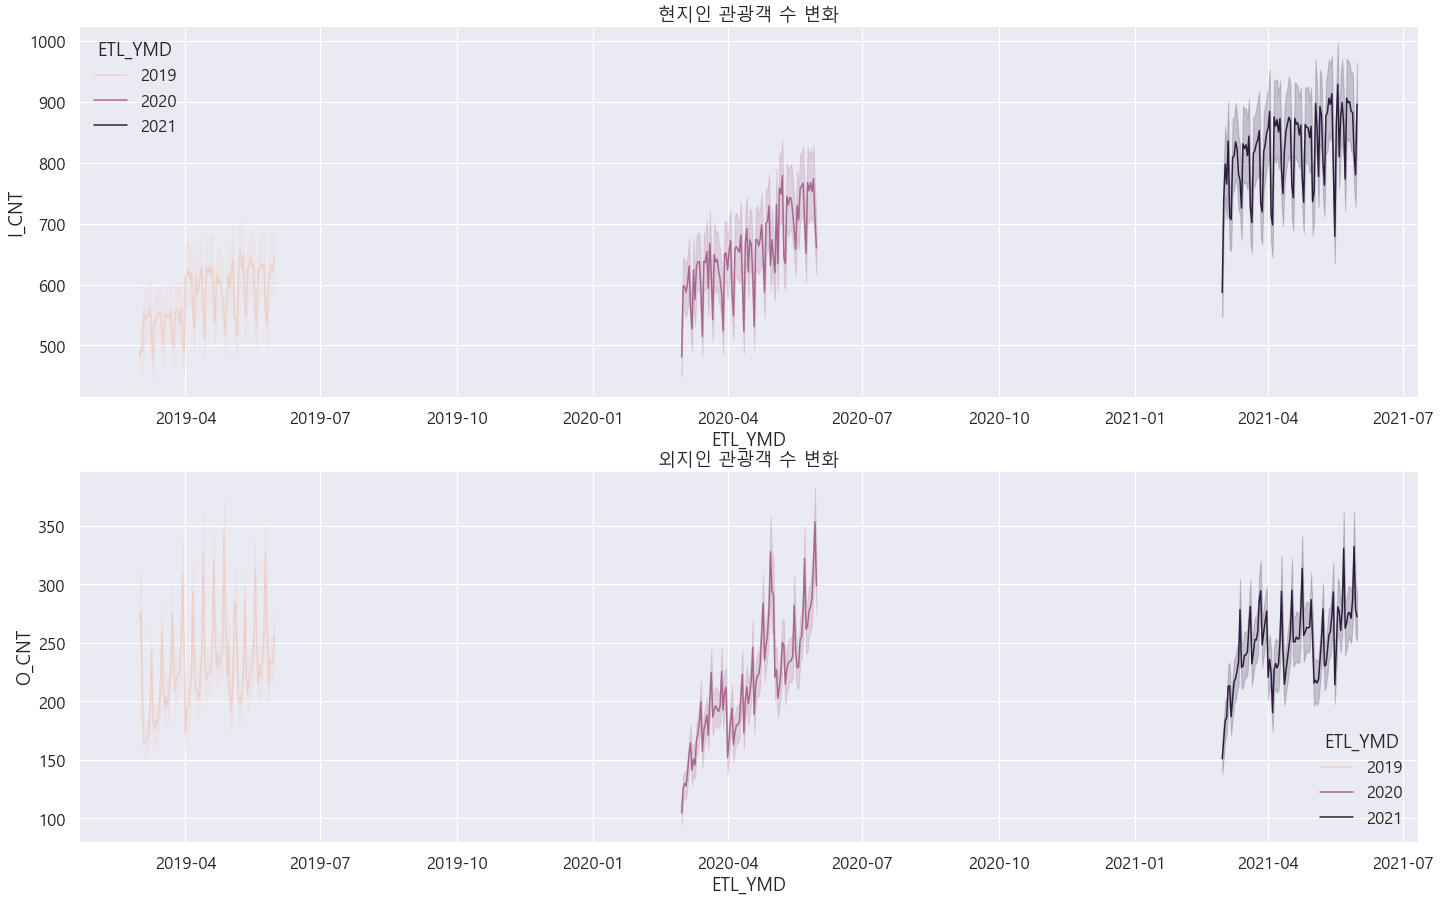

In [181]:
# 코로나 전(2019)후(2020-21) 외지인 시니어 관광객 수 변화 비교
# 코로나 전후 현지인 시니어 관광객 수 변화 비교

f,ax = plt.subplots(2, 1, figsize = (24,15))

sns.lineplot( data = STR_df, x='ETL_YMD' , y = 'I_CNT', hue =STR_df['ETL_YMD'].dt.year, ax = ax[0])
ax[0].set_title('현지인 관광객 수 변화')


sns.lineplot( data = STR_df, x='ETL_YMD' , y = 'O_CNT', hue =STR_df['ETL_YMD'].dt.year, ax = ax[1])
ax[1].set_title('외지인 관광객 수 변화')

plt.show()

- 코로나 전후로 비교해볼 때 현지인 관광객의 경우 코로나 전보다 코로나 후에 관광객이 많이 늘었다 => 코로나 홈코노미 트렌드 영향
- 외지인 관광객 수는 2020년 3월 눈에 띄게 줄었지만 전반적으로 코로나 전후 관광객 수의 큰 차이가 없음을 알 수 있다

*memo*
- *시니어시설은 무장애시설과 노인복지시설로 크게 나눌 수 있음*
- *현지인들이 주로 이용하는 노인복지시설의 유무가 관광객수에 영향을 미칠 수 있음*

In [195]:
STR_df['year'] = STR_df['ETL_YMD'].dt.year

#### 년도별 현지인/외지인 관광객수 변화(시군구별)

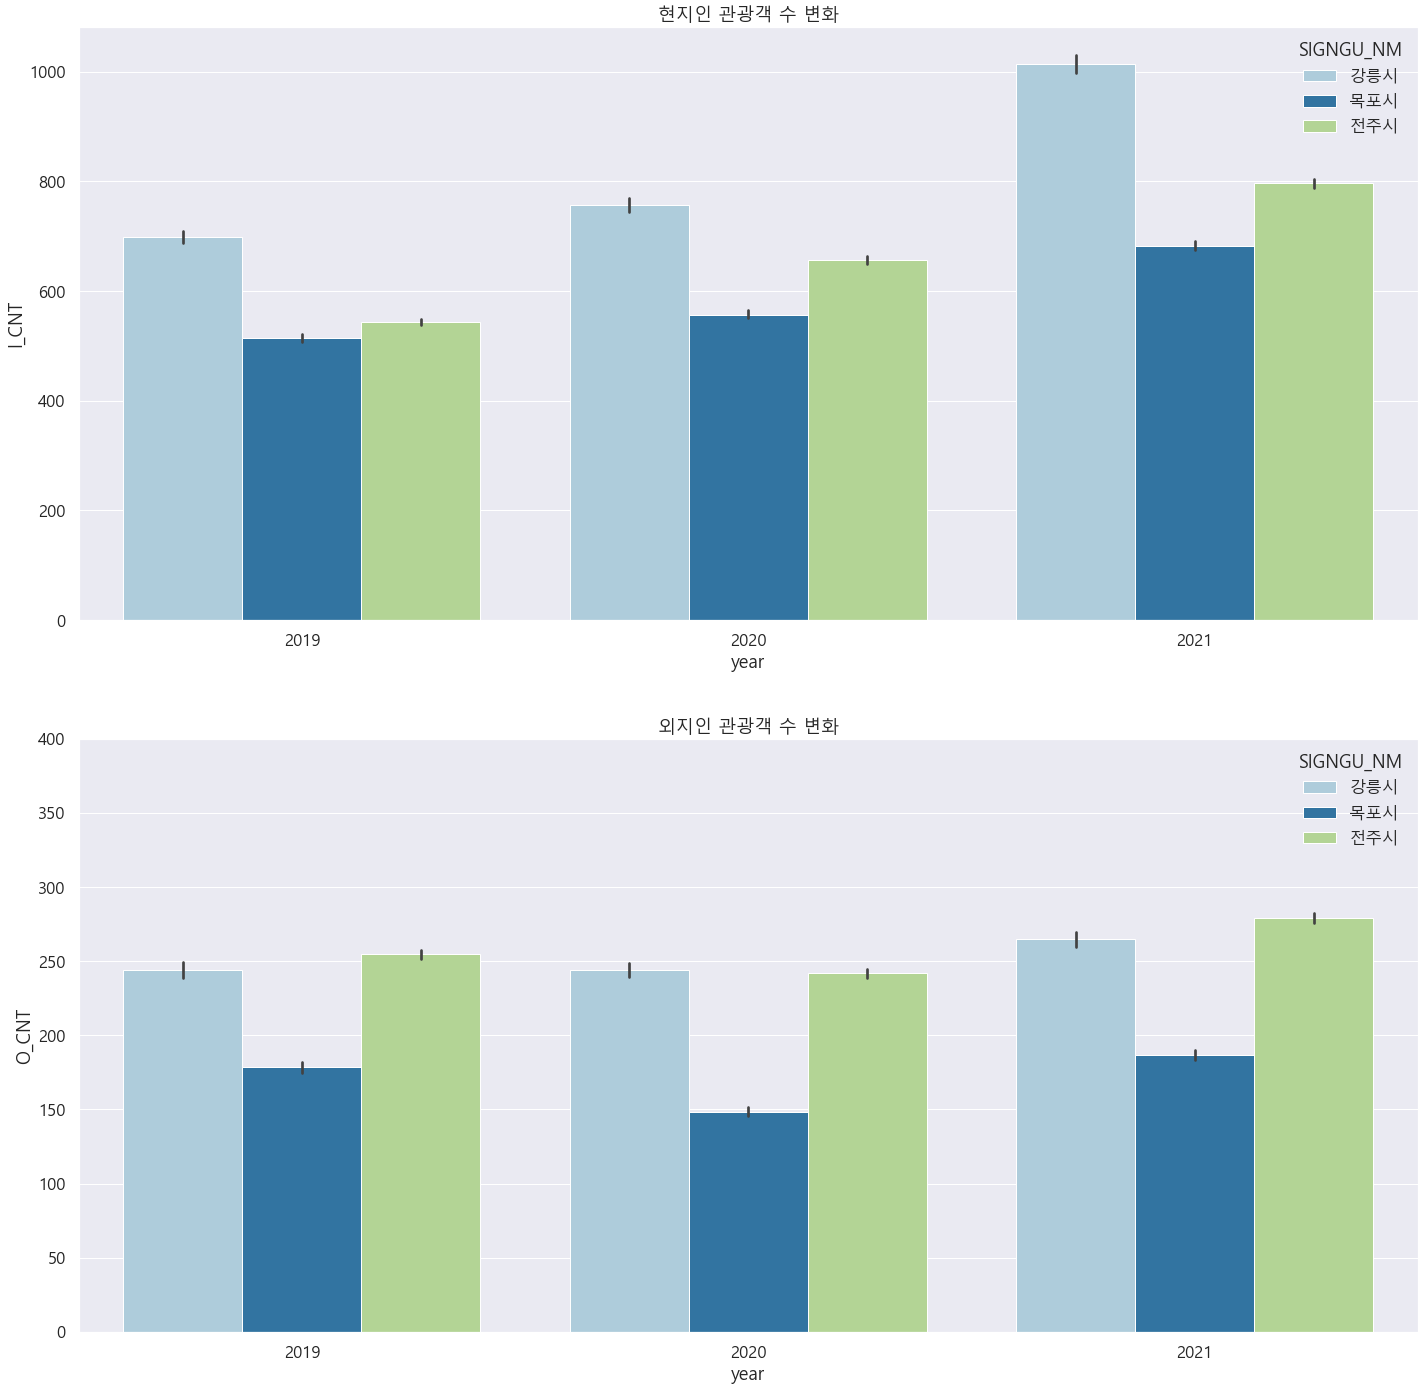

In [196]:
# 코로나 전(2019)후(2020-21) 외지인 시니어 관광객 수 변화 비교
# 코로나 전후 현지인 시니어 관광객 수 변화 비교

f,ax = plt.subplots(2, 1, figsize = (24,24))

sns.set_palette("Paired")
sns.barplot( data = STR_df, x='year' , y = 'I_CNT', hue ='SIGNGU_NM', ax = ax[0])
ax[0].set_title('현지인 관광객 수 변화')


sns.barplot( data = STR_df, x='year' , y = 'O_CNT',  hue ='SIGNGU_NM', ax = ax[1])
ax[1].set_title('외지인 관광객 수 변화')
ax[1].set(ylim  = (0, 400))

plt.show()

In [197]:
# 성별 관광객 수 차이 비교
# 총 관광객 수 컬럼 생성
STR_df['A_CNT'] = STR_df['I_CNT']  + STR_df['O_CNT']

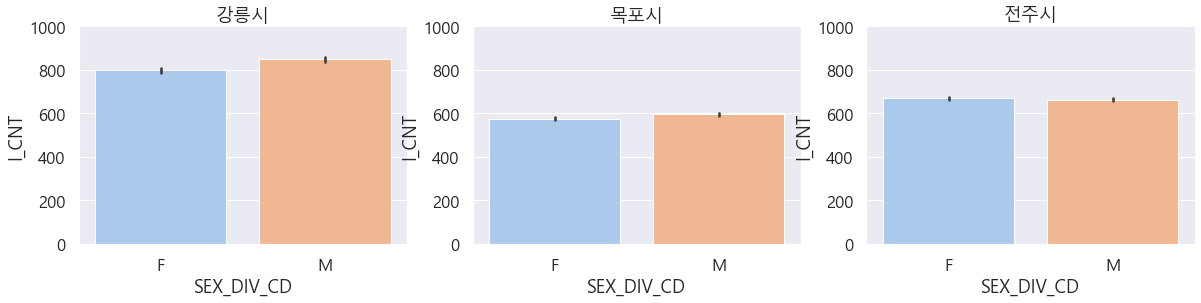

In [209]:
f, ax =plt.subplots(1, 3, figsize = (20,4))

sns.barplot( data = STR_df[STR_df['SIGNGU_NM']=='강릉시'], x='SEX_DIV_CD' , y = 'I_CNT',  ax = ax[0])
ax[0].set_title('강릉시')
ax[0].set(ylim  = (0, 1000))

sns.barplot( data = STR_df[STR_df['SIGNGU_NM']=='목포시'], x='SEX_DIV_CD' , y = 'I_CNT', ax = ax[1])
ax[1].set_title('목포시')
ax[1].set(ylim  = (0, 1000))

sns.barplot( data = STR_df[STR_df['SIGNGU_NM']=='전주시'], x='SEX_DIV_CD' , y = 'I_CNT', ax = ax[2])
ax[2].set_title('전주시')
ax[2].set(ylim  = (0, 1000))
plt.show()


- 전체적으로 여성이 조금 적고 큰 차이 없음